In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option("display.max_columns", None)
#df = pd.read_csv("Data/data.csv", delimiter=";")
df = pd.read_csv("Data/apartments_for_rent_classified_10K.csv", delimiter=";", encoding='cp1252')
#df = pd.read_csv("Data/in-vehicle-coupon-recommendation.csv")
df.head(20)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,NaN,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
5,5667891676,housing/rent/apartment,0 BR in New York NY 10019,**RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVA...,"Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0.0,USD,No,Thumbnail,NaN,2475,"$2,475",Monthly,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784
6,5668627426,housing/rent/apartment,Studio apartment 2432 Penmar Ave,"This unit is located at 2432 Penmar Ave, Venic...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,1800,"$1,800",Monthly,132,2432 Penmar Avenue,Venice,CA,33.9932,-118.4609,RentLingo,1577359461
7,5668626687,housing/rent/apartment,"Studio apartment Oak St NW, 16th St NW, Washin...","This unit is located at Oak St NW, 16th St NW,...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,840,$840,Monthly,136,NaN,Washington,DC,38.9328,-77.0297,RentLingo,1577359393
8,5668610290,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0.0,USD,No,Thumbnail,NaN,1495,"$1,495",Monthly,138,333 Hyde St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313
9,5668627023,housing/rent/apartment,"Studio apartment A St SE, 19th St SE, Washington","This unit is located at A St SE, 19th St SE, W...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,890,$890,Monthly,141,NaN,Washington,DC,38.9118,-77.0132,RentLingo,1577359424


In [5]:
# Check if there are any missing values at all
df.isnull().values.any()
#df["car"].isnull().values.any()

np.True_

id
5668626895    1
5508889531    1
5509078953    1
5509076249    1
5668635186    1
             ..
5509122779    1
5509159086    1
5668628684    1
5668612715    1
5509132540    1
Name: count, Length: 10000, dtype: int64


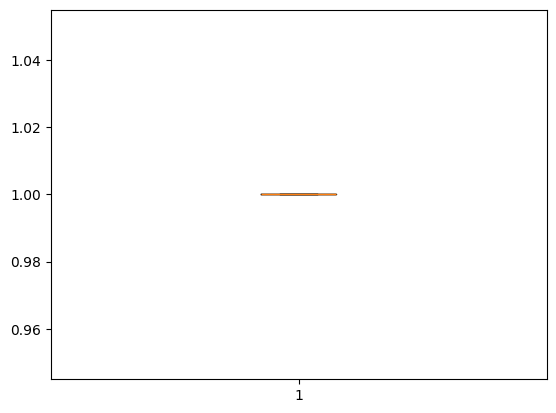

category
housing/rent/apartment     9996
housing/rent/home             2
housing/rent/short_term       2
Name: count, dtype: int64


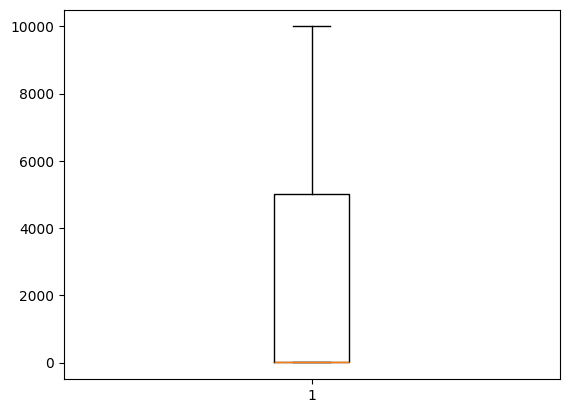

title
Apartment in great location                           40
Super Cute! Apartment for Rent!                       32
Apartment in prime location                           31
This Apartment is a must see!                         27
Apartment in quiet area, spacious with big kitchen    26
                                                      ..
One BR 218 South Walnut                                1
One BR 5505 Bonner Ave.,                               1
One BR 21200 Kittridge St                              1
One BR 807 WEST LYNN                                   1
Beautiful Lawrenceville Apartment for rent             1
Name: count, Length: 9350, dtype: int64


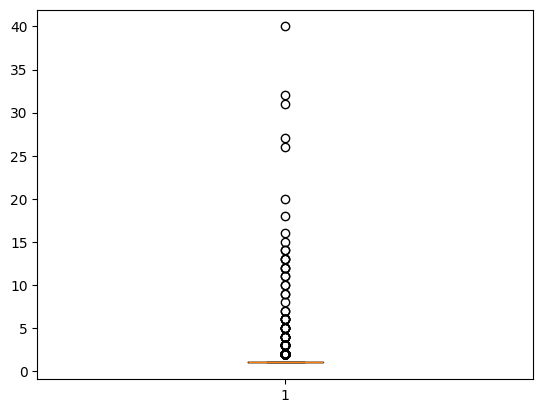

body
When searching for a pet-friendly One-, Two- and 3 Beds apartment homes in Randallstown, look no further than Northwest Crossing. Northwest Crossing's convenient suburban. and Liberty provides you with immediate access to shopping, entertainment, transportation and is directly across from Northwest Hospital. Commuters enjoy easy access to Baltimore's Inner, Baltimore Washington International Airport BWI, Owings Mills, Pikesville, and Catonsville. The Crossing enjoy the comforts of an apartment they are truly proud to with wall-to-wall carpeting, fully-equipped kitchens with dishwashers, over-sized closets and expansive balconies. Outside your home, Northwest Crossing boasts a fitness facilities, basketball and professionally landscaped grounds with picnic areas. Take pleasure in knowing that our professional management team is here to assist you with any need great or small. We are excited to meet you and welcome you home!                                                           

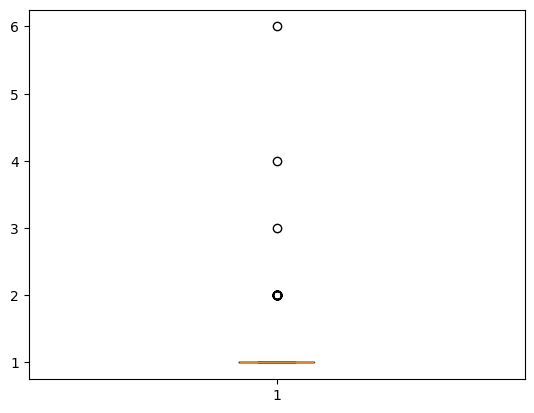

amenities
Parking                                                                                                                                 229
Dishwasher,Refrigerator                                                                                                                 225
Pool                                                                                                                                    171
Dishwasher,Parking,Pool                                                                                                                 149
Dishwasher                                                                                                                              147
                                                                                                                                       ... 
Cable or Satellite,Clubhouse,Dishwasher,Hot Tub,Internet Access,Parking,Patio/Deck,Pool,Refrigerator                                      1
Cable or S

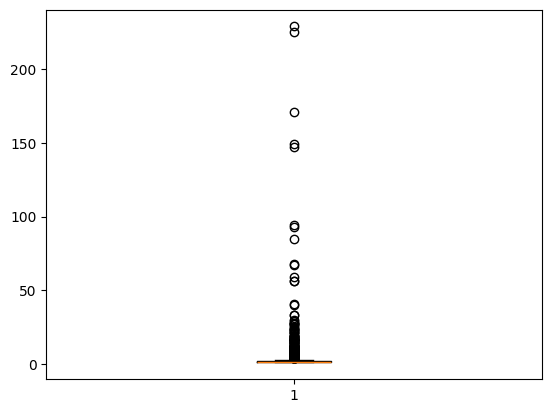

bathrooms
1.0    6639
2.0    2418
2.5     315
1.5     282
3.0     174
3.5      66
4.0      46
4.5      12
5.0       8
7.0       2
5.5       1
6.0       1
8.0       1
8.5       1
Name: count, dtype: int64


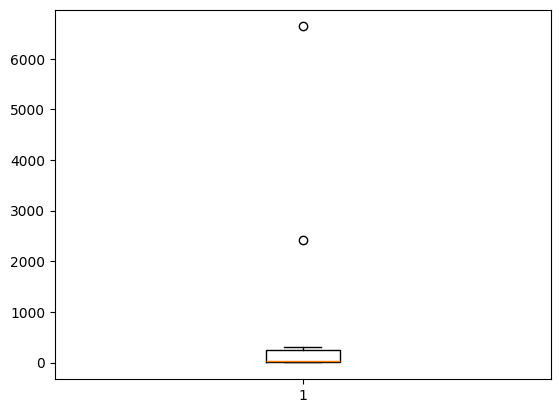

bedrooms
1.0    4607
2.0    3398
3.0    1276
4.0     404
0.0     198
5.0      89
6.0      15
7.0       3
8.0       2
9.0       1
Name: count, dtype: int64


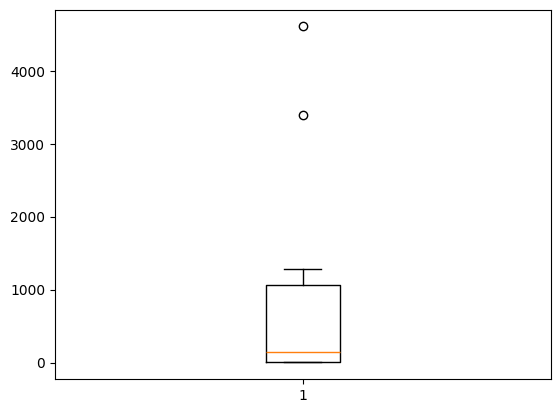

currency
USD    10000
Name: count, dtype: int64


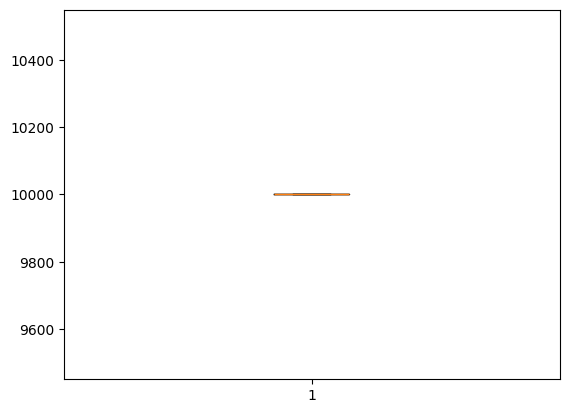

fee
No    10000
Name: count, dtype: int64


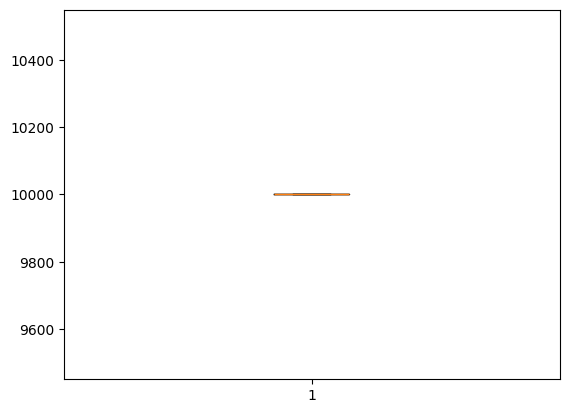

has_photo
Thumbnail    8907
Yes           909
No            184
Name: count, dtype: int64


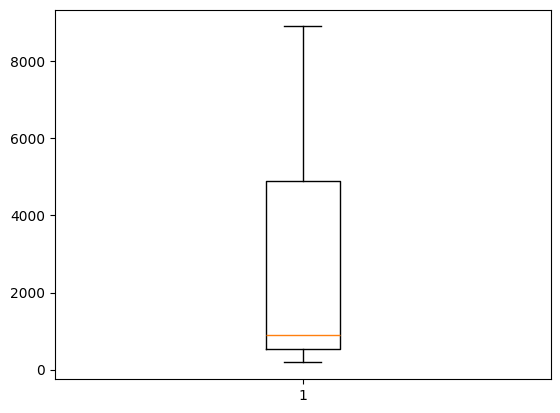

pets_allowed
Cats,Dogs    5228
Cats          485
Dogs          124
Name: count, dtype: int64


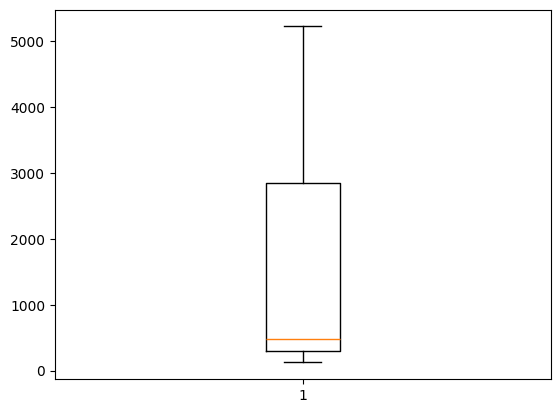

price
1350    86
1250    81
850     79
1100    77
1400    74
        ..
1667     1
2053     1
813      1
1228     1
4790     1
Name: count, Length: 1725, dtype: int64


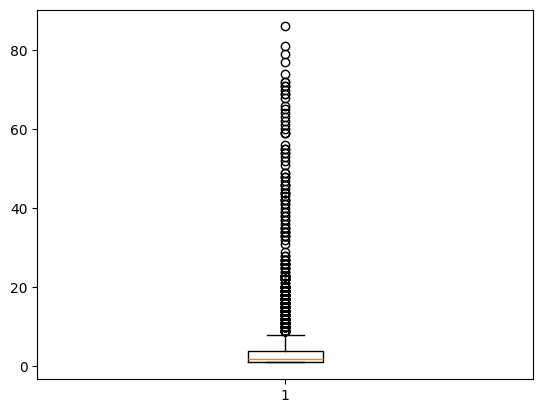

price_display
$1,350    86
$1,250    81
$850      79
$1,100    77
$1,400    74
          ..
$1,667     1
$2,053     1
$813       1
$1,228     1
$4,790     1
Name: count, Length: 1726, dtype: int64


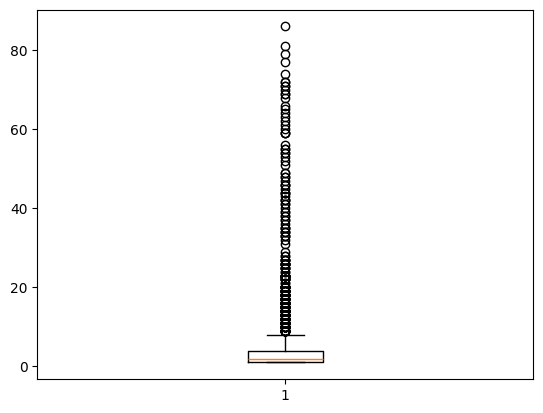

price_type
Monthly           9998
Weekly               1
Monthly|Weekly       1
Name: count, dtype: int64


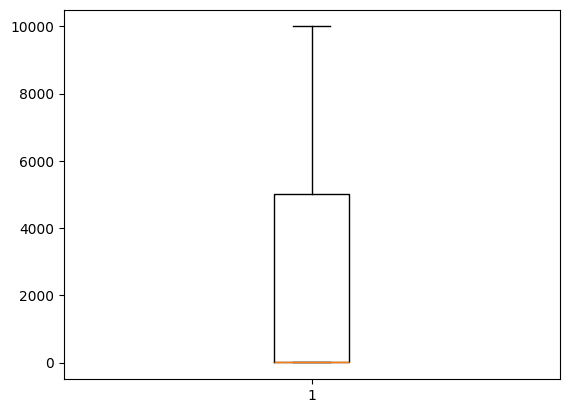

square_feet
700      189
800      161
600      154
900      148
750      139
        ... 
1622       1
1623       1
1625       1
1626       1
40000      1
Name: count, Length: 1738, dtype: int64


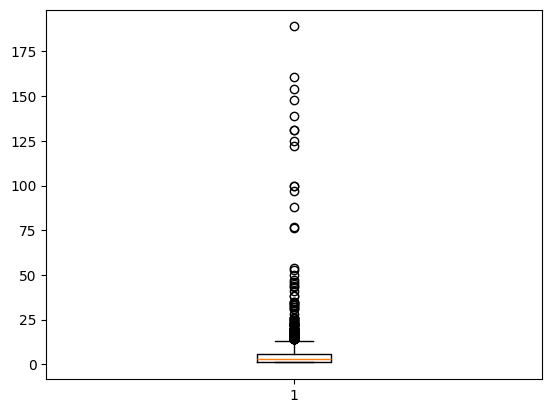

address
908 8th SW St                3
901 Hidden Valley Drive      3
500 Sleepy Hollow Rd         3
1050 Manhattan Boulevard     2
1624 Jennifer Road           2
                            ..
2300 Woodland Crossing Dr    1
2050 E 15th Avenue           1
1728 Barton Springs Road     1
1915 Patzman St              1
9908 Bentcross Dr            1
Name: count, Length: 6658, dtype: int64


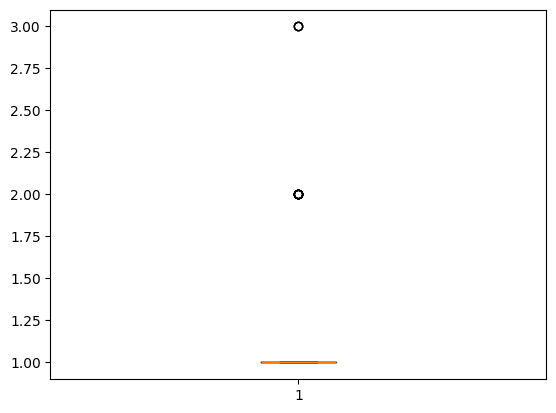

cityname
Austin           523
Dallas           216
Houston          186
San Antonio      182
Los Angeles      165
                ... 
Keizer             1
Keyser             1
Pompano Beach      1
Tiverton           1
Bella Vista        1
Name: count, Length: 1574, dtype: int64


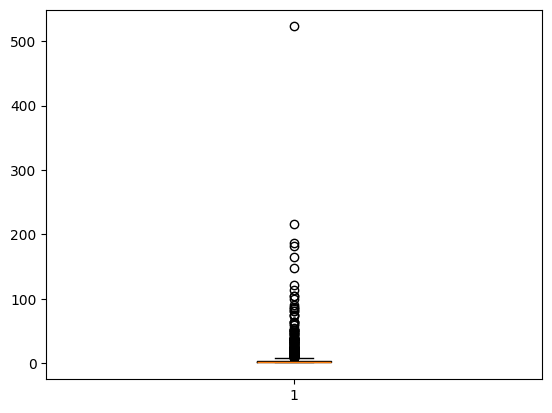

state
TX    1737
CA     955
WA     519
NC     438
MD     424
NJ     383
GA     372
FL     339
OH     321
CO     318
WI     302
IL     282
MO     239
IN     239
MN     221
VA     205
OR     197
PA     183
IA     179
OK     178
MI     176
MA     167
AZ     126
NV     121
ND     113
NE     105
CT      98
TN      92
UT      84
KS      83
DC      80
SC      77
NY      71
NH      70
SD      66
LA      66
AL      56
AR      56
AK      44
KY      40
ID      21
VT      16
NM      14
HI      12
RI      11
MS       9
MT       7
DE       5
WV       3
ME       2
WY       1
Name: count, dtype: int64


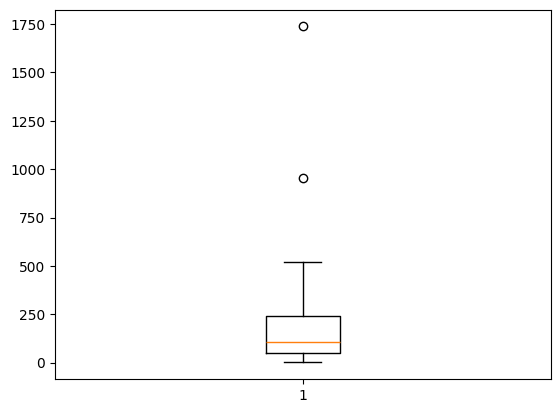

latitude
30.3054    512
29.7714    176
29.4624    176
41.8625    139
43.0724    118
          ... 
39.9143      1
40.6655      1
32.3229      1
30.2450      1
40.7716      1
Name: count, Length: 2395, dtype: int64


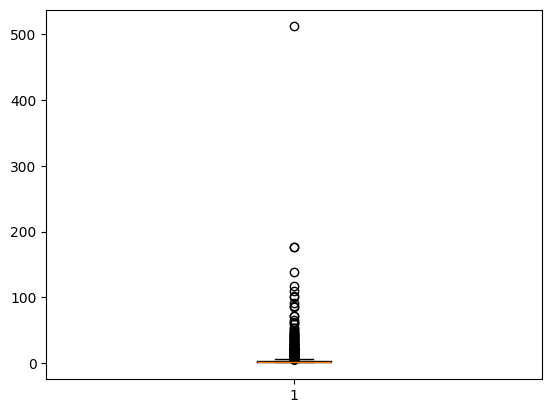

longitude
-97.7497     512
-95.4343     176
-98.5253     176
-87.6825     139
-89.4003     118
            ... 
-93.8774       1
-98.2339       1
-78.7023       1
-117.8821      1
-73.9876       1
Name: count, Length: 2392, dtype: int64


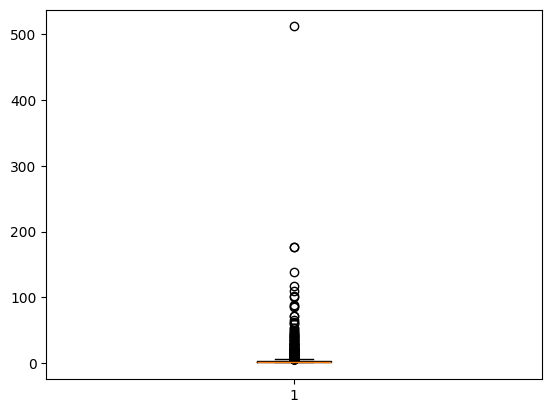

source
RentLingo            6912
RentDigs.com         2764
ListedBuy             179
RealRentals            69
GoSection8             31
Listanza               23
RENTOCULAR             16
rentbits                2
Home Rentals            1
Real Estate Agent       1
RENTCafé                1
tenantcloud             1
Name: count, dtype: int64


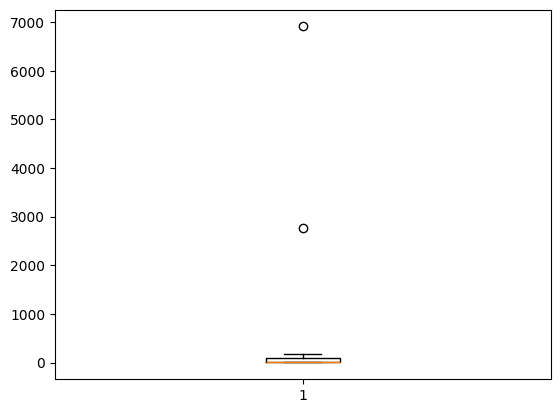

time
1577016866    5
1577359489    5
1577359251    5
1577359415    4
1577359184    4
             ..
1568747866    1
1577016088    1
1568778656    1
1568775832    1
1577362141    1
Name: count, Length: 6310, dtype: int64


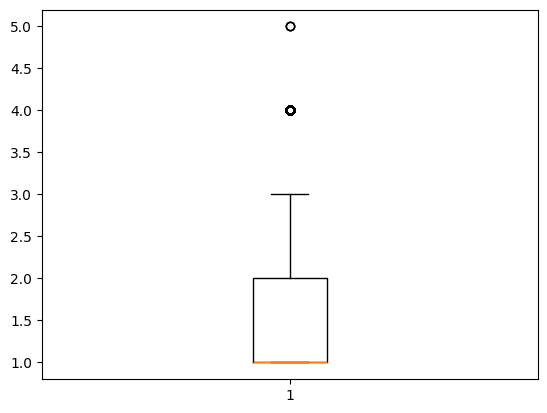

In [6]:
# Print frequency of each category (ignore not categorical columns such as grade etc.)
for column in df.columns:
    print(df[column].value_counts())
    plt.boxplot(df[column].value_counts())
    plt.show()
    #plt.hist(df[column].value_counts())
    #plt.show()

In [14]:
df_sorted = df.sort_values("price")
df_duplicated = df["price"].duplicated().any()

In [27]:
df_sorted

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
181,5664571561,housing/rent/apartment,One BR Ridge Road,"This unit is located at Ridge Road, Mount Airy...",NaN,1.0,1.0,USD,No,Thumbnail,NaN,200,$200,Monthly,250,NaN,Mount Airy,MD,39.3903,-77.1487,RentLingo,1577015099
1751,5668626546,housing/rent/apartment,Studio apartment 116 N 2nd St,"This unit is located at 116 N second St, Decat...","Dishwasher,Parking",1.0,1.0,USD,No,Thumbnail,NaN,224,$224,Monthly,587,116 N 2nd St,Decatur,IN,40.8297,-84.9270,RentLingo,1577359381
235,5625835116,housing/rent/apartment,A-P-T Suites Lakeland - Low Weekly & Monthly R...,A-P-T Suites is your next Extended Stay! We ha...,"Cable or Satellite,Pool,Refrigerator,Storage,TV",NaN,NaN,USD,No,Thumbnail,"Cats,Dogs",275,$275 Monthly|Weekly,Monthly|Weekly,300,NaN,Lakeland,FL,28.0451,-81.9689,ListedBuy,1574891000
4435,5668617931,housing/rent/apartment,One BR 1200 Mallard Drive,"This unit is located at 1200 Mallard Drive, Mi...","Clubhouse,Parking,Patio/Deck,Playground,Refrig...",1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",288,$288,Monthly,766,1200 Mallard Dr,Michigan City,IN,41.7092,-86.8652,RentLingo,1577358823
475,5668620544,housing/rent/apartment,Studio apartment 4440 Gulfway Dr,"This unit is located at 4440 Gulfway Dr, Port ...","Cable or Satellite,Dishwasher,Parking,Refriger...",1.0,2.0,USD,No,Thumbnail,NaN,300,$300,Monthly,400,4440 Gulfway Drive,Port Arthur,TX,29.9142,-93.9383,RentLingo,1577359005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8581,5508735725,housing/rent/apartment,Two BR Apartment - Located along the Wilshire ...,Wilshire Margot represents luxurious. best. Ou...,NaN,2.0,2.0,USD,No,Thumbnail,NaN,13500,"$13,500",Monthly,1325,NaN,Los Angeles,CA,34.0630,-118.4363,RentDigs.com,1568748646
9972,5664581587,housing/rent/apartment,Six BR 3033 N Beverly Glen Cir,This unit is located at 3033 N Beverly Glen Ci...,NaN,4.0,6.0,USD,No,Thumbnail,NaN,14950,"$14,950",Monthly,4044,3033 N Beverly Glen Circle,Los Angeles,CA,34.0372,-118.2972,RentLingo,1577015930
9990,5659901599,housing/rent/apartment,Four BR 864 Teakwood Rd,"This unit is located at 864 Teakwood Rd, Los A...","Dishwasher,Parking,Pool,Refrigerator",5.0,4.0,USD,No,Thumbnail,"Cats,Dogs",19500,"$19,500",Monthly,5000,864 Teakwood Road,Los Angeles,CA,34.0372,-118.2972,RentLingo,1576666648
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,NaN,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419


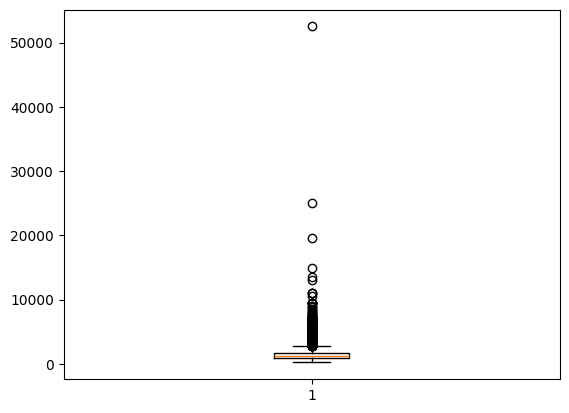

In [30]:
plt.boxplot(df["price"])
plt.show()